# Oct 14 collected sample

Michelle ran this sample.  spreadsheet

"BreslAu River Filtered Collected Oct 14.23.xlsx"

In [117]:
% housekeeping
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
%graphics_toolkit ("plotly"); 

In [118]:
% put in constants
VT=0.05; %total volume
stockPbconc=1000e-6; %M

In [119]:
% put in data

originalsamplemVnpH=[...
%pH mV
8.498  -147.1
8.503  -144.1
8.527  -144.7
];

calibdata=[...
%volPb mV pH
0 33.7 2.068
1 41 2.057
3 44.1 2.054
%10 46.7 2.057
%100 45.2 2.049
%1000 186.4 1.468
];


pH = 8.5093e+00


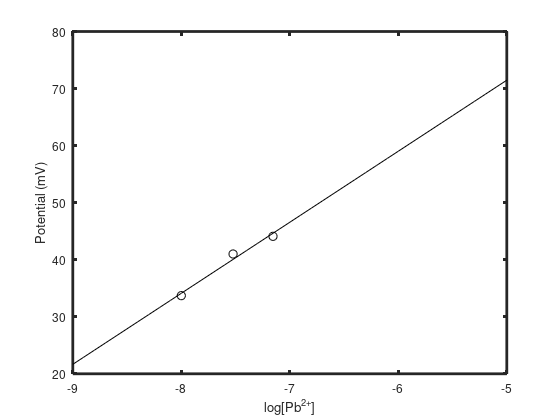

param,1,2
1,12.4514,133.723


In [120]:
graphics_toolkit("notebook")
% pull out the sample data
pH=mean(originalsamplemVnpH(:,1))
mVoriginal=(originalsamplemVnpH(:,2));

%pull out the calibration data
addedPbvol=calibdata(:,1)'*1e-6; pHcalib=calibdata(:,3); mV=calibdata(:,2)'; 
PbTmeas=10e-9; % not actually known until it is measured 
PbT=PbTmeas; PbTplus=(PbTmeas*(VT)+addedPbvol*stockPbconc)./(VT+addedPbvol);

plot(log10(PbTplus),mV,'ko'); hold on

%chlorocorrecxtion
%BF1=2.49; BF2=1.14; BF3=0.9; ClT=4.9904e-4; %from Inorg. Chem. 1983. 22. 3323-3326.
%CuTplus=CuTplus./(1+BF1*ClT+BF2*ClT^2+BF3*ClT^3);

param=polyfit([log10(PbTplus)],[mV],1)
m=param(1); Eo=param(2); logPbplot=-9:0.1:-5;
val=polyval(param,logPbplot);
plot(logPbplot,val,'k-');
xlabel('log[Pb^{2+}]');  ylabel('mV');
set(gca,'fontsize',12); set(gca,'linewidth',2);
xlabel('log[Pb^{2+}]'); ylabel('Potential (mV)')

logPboriginal,1
1,-22.5536
2,-22.3127
3,-22.3608


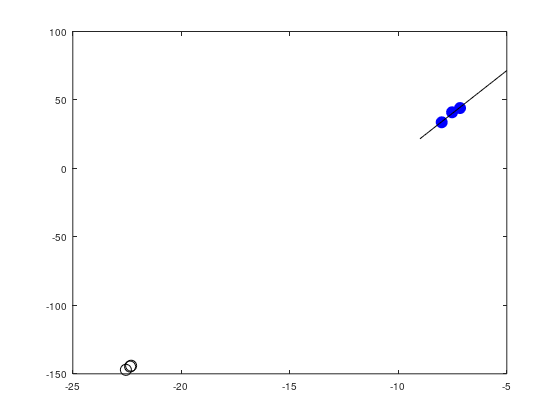

In [121]:
% then use this metacalibration to determine original sample logPb2+

logPboriginal=(mVoriginal-Eo)/m

plot(log10(PbTplus),mV,'bo','markersize',8,'markerfacecolor','b'); hold on
plot(logPbplot,val,'k-')
plot(logPboriginal,mVoriginal,'ko','markersize',8)